# FIRST ORDER ODE SOLVER

In [59]:
#Import the required packages

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.integrate import solve_ivp
import pandas as pd
import csv

In [60]:
def my_derivative(t, y): 
    #t is the independent variable,y is the dependent variable, omega is parameters. The order matters.
    return omega

def theta_der(t,theta):
    return omega*(1 + e*np.cos(theta))**2

In [61]:
t_span = (0,364) 

t_span denotes a 2-tuple of floats (t0, tf). t0 denotes the start point and it integrates till it reaches tf

In [62]:
t = np.linspace(0,364,365)


t denotes the time points at which we would like the solver to compute and store the solution. If t is not specified, the solver will by default store values at those time points as specified by the algorithm for the numerical integration (NOT RECOMMENDED). Note that t must be within the interval specified by t_span.

In [63]:
y0 = np.array([0])


y0 is the array of initial conditions at t0. Since ours is a first order differential equation, this would be a one dimensional array.

In [64]:
omega = 0.9856474*(np.pi/180) #rad/day
e = 0.0167
phi = 23.44*(np.pi/180)
omega

0.017202792393721557

This is the parameter.

Now we give the ODE to the solver

In [65]:
mean_sun = solve_ivp(my_derivative,t_span,y0,t_eval = t,args = (omega))
actual_sun = solve_ivp(theta_der,t_span,y0,t_eval = t,args = (omega,e))

In [66]:
m_theta = mean_sun.y[0]
time = mean_sun.t


Above we obtained the mean suns azimuthal positions

In [67]:
theta = actual_sun.y[0]
day_num = actual_sun.t
Dev_time = (m_theta - theta)*(180/np.pi)*4 #Deviation of angular position in earth minutes 1 degree = 4 minutes

Here we obtain the postion of actual sun

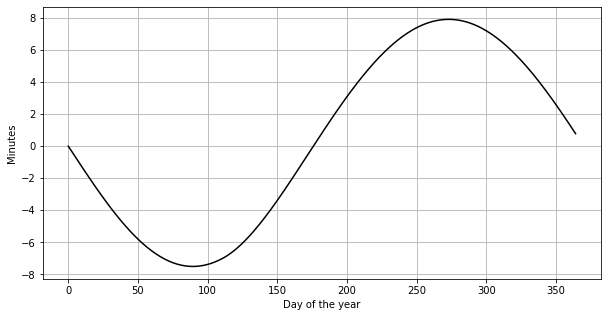

In [68]:
plt.figure(figsize=(10,5))
plt.xlabel("Day of the year")
plt.ylabel("Minutes")
plt.plot(day_num,Dev_time,'black')
plt.grid()
plt.savefig('Elliptical_effect.png')

# Obliquity effect 

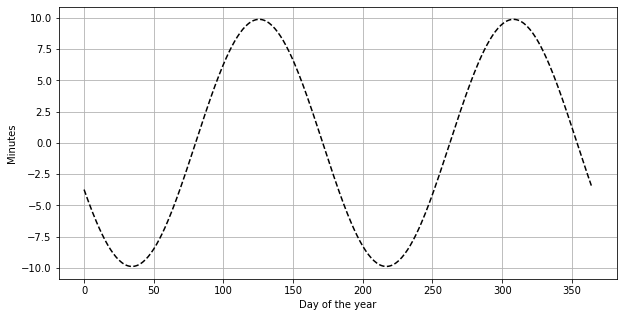

In [69]:
Obliquity = 9.87*np.sin(4*np.pi/365 * (day_num-80))
plt.figure(figsize=(10,5))
plt.xlabel("Day of the year")
plt.ylabel("Minutes")
plt.plot(day_num,Obliquity,'--',color = 'black')
plt.grid()
plt.savefig('obliquity_effect.png')

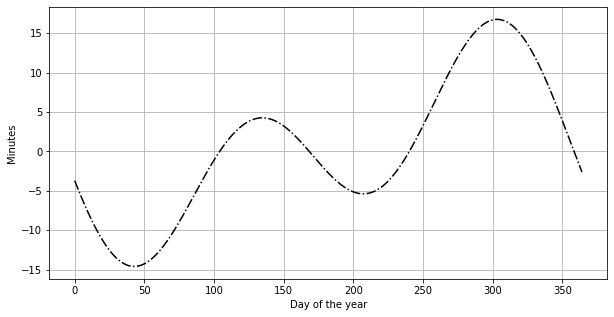

In [70]:
plt.figure(figsize=(10,5))
plt.xlabel("Day of the year")
plt.ylabel("Minutes")
#plt.plot(day,Dev_time)
plt.plot(day_num,Obliquity+Dev_time,'-.',color = 'black') 
plt.grid()
plt.savefig('EOT.png')

# Comparing with JPL Horizon data

In [71]:
with open('EoT.csv',newline='') as file:
    jpldata_lst = list(csv.reader(file))
    
jpldata=np.array(jpldata_lst)

In [72]:
EOT_data = list(map(float,jpldata[1:,1]))   
EOT_ = (np.array(EOT_data)-180)*4

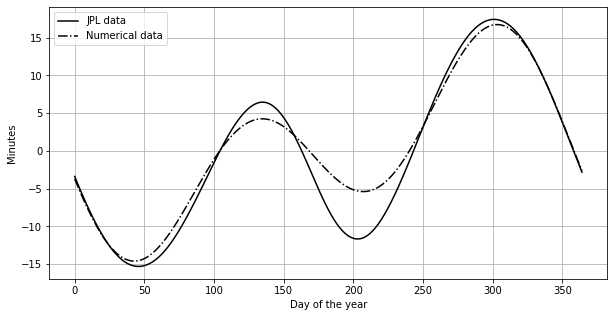

In [73]:
plt.figure(figsize=(10,5))
plt.xlabel("Day of the year")
plt.ylabel("Minutes")
plt.plot(day_num,EOT_,'black',label = "JPL data")    #jpl data
plt.plot(day_num,Obliquity+Dev_time,'-.',color="black",label = "Numerical data")
plt.legend(loc = "upper left")
plt.grid()
plt.savefig("JPL_data.png")

# Error graph

199 -6.445879014778331


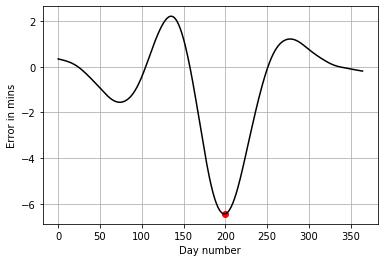

In [74]:
Error = EOT_ - (Obliquity+Dev_time)
for i in range(0,len(Error)):
    if (np.amin(Error) == Error[i]):
        break
plt.xlabel("Day number")
plt.ylabel("Error in mins")
plt.plot(i, np.amin(Error),'ro')
plt.plot(day_num,Error,'black')
plt.grid()
plt.savefig("Error graph")
print(i,np.amin(Error))

# Analemma

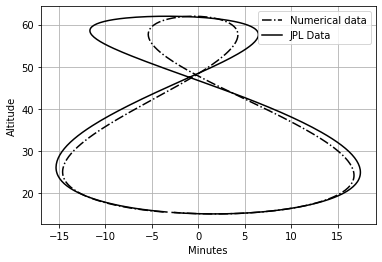

In [75]:
with open('JPL altitude.csv',newline='') as file:
    analemma_data = list(csv.reader(file))
    
Altitude_data = np.array(analemma_data)

altitude = list(map(float,Altitude_data[1:]))
plt.xlabel("Minutes")
plt.ylabel("Altitude")
plt.plot(Obliquity+Dev_time,altitude,'-.',color = 'black',label="Numerical data")
plt.plot(EOT_,altitude,color = 'black',label="JPL Data")
plt.legend(loc="upper right")
plt.grid()
plt.savefig("analemma.png")